In [1]:
import findspark
findspark.init("/Users/jennyzhou/Downloads/spark-2.4.5-bin-hadoop2.7")
%run data.py

# Permitted Events Data (2020 Original vs. Updated)

2020 Originally Planned Evenets

In [2]:
# NYC Permitted Event Information-Original 5.94M rows
# get year 2020 data out
planned_event = "https://data.cityofnewyork.us/resource/bkfu-528j.csv?$select=event_id,event_name,start_date_time,end_date_time,event_type,event_borough&$where=start_date_time>'2020-01-01T00:00:00.000'&$limit=5000000"

In [3]:
planned = pd.read_csv(planned_event)

In [4]:
planned.count()

event_id           1524105
event_name         1524105
start_date_time    1524105
end_date_time      1524105
event_type         1524105
event_borough      1524105
dtype: int64

In [5]:
planned.head(5)

,event_id,event_name,start_date_time,end_date_time,event_type,event_borough
0,516637,Lawn Maintenance- Veteran's Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
1,516638,Lawn Maintenance,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
2,516639,Lawn Maintenance- Redbud Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
3,516641,Lawn Maintenance- Cherry Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
4,516642,Lawn Maintenance- Farragut Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan


In [6]:
planneddf = pandas_to_spark(planned)

In [8]:
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import month, year
planneddf = planneddf.withColumn("planned_date", to_timestamp("start_date_time", "yyyy-MM-dd'T'HH:mm:ss.SSS"))

In [9]:
planneddf.createOrReplaceTempView("plannedT")

In [63]:
planned = spark.sql("""
SELECT DATE(planned_date) AS date,
    COUNT(*) AS num_of_events
FROM plannedT
GROUP BY date
ORDER BY date
""")

In [64]:
planned_pd = planned.toPandas()

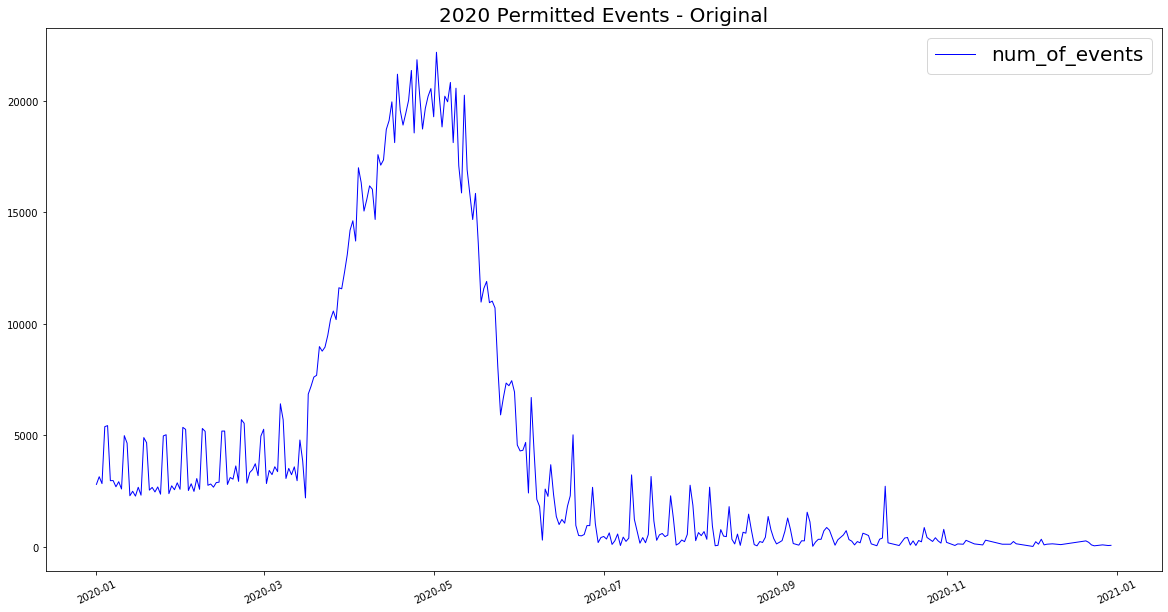

In [65]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot('date','num_of_events', data=planned_pd, marker='', color='blue', linewidth=1)
plt.title('2020 Permitted Events - Original',fontsize = 20)
plt.xticks( rotation=25 )
plt.rcParams['figure.figsize'] = (20,10)
plt.legend(prop={"size":20})

2020 Updated/Actual Events

In [14]:
# NYC Permitted Event Information-Updated 19.4K rows
#get 2020 data out
updated_event = "https://data.cityofnewyork.us/resource/tvpp-9vvx.csv?$select=event_id,event_name,start_date_time,end_date_time,event_type,event_borough&$where=start_date_time>'2020-01-01T00:00:00.000'&$limit=5000000"

In [15]:
updated = pd.read_csv(updated_event)

In [16]:
updated.count()

event_id           19494
event_name         19494
start_date_time    19494
end_date_time      19494
event_type         19494
event_borough      19494
dtype: int64

In [17]:
updated.head(5)

,event_id,event_name,start_date_time,end_date_time,event_type,event_borough
0,495738,Party,2020-08-01T11:00:00.000,2020-08-01T19:00:00.000,Special Event,Queens
1,498846,Down to Earth Chelsea Farmers Market,2020-05-09T07:00:00.000,2020-05-09T18:00:00.000,Farmers Market,Manhattan
2,498846,Down to Earth Chelsea Farmers Market,2020-05-16T07:00:00.000,2020-05-16T18:00:00.000,Farmers Market,Manhattan
3,498846,Down to Earth Chelsea Farmers Market,2020-05-23T07:00:00.000,2020-05-23T18:00:00.000,Farmers Market,Manhattan
4,498846,Down to Earth Chelsea Farmers Market,2020-05-30T07:00:00.000,2020-05-30T18:00:00.000,Farmers Market,Manhattan


In [18]:
updateddf = pandas_to_spark(updated)

In [20]:
updateddf = updateddf.withColumn("updated_date", to_timestamp("start_date_time", "yyyy-MM-dd'T'HH:mm:ss.SSS"))

In [21]:
updateddf.createOrReplaceTempView("updatedT")

In [59]:
updated = spark.sql("""
SELECT DATE(updated_date) AS date,
    COUNT(*) AS num_of_events
FROM updatedT
GROUP BY date
ORDER BY date
""")

In [60]:
updated_pd = updated.toPandas()

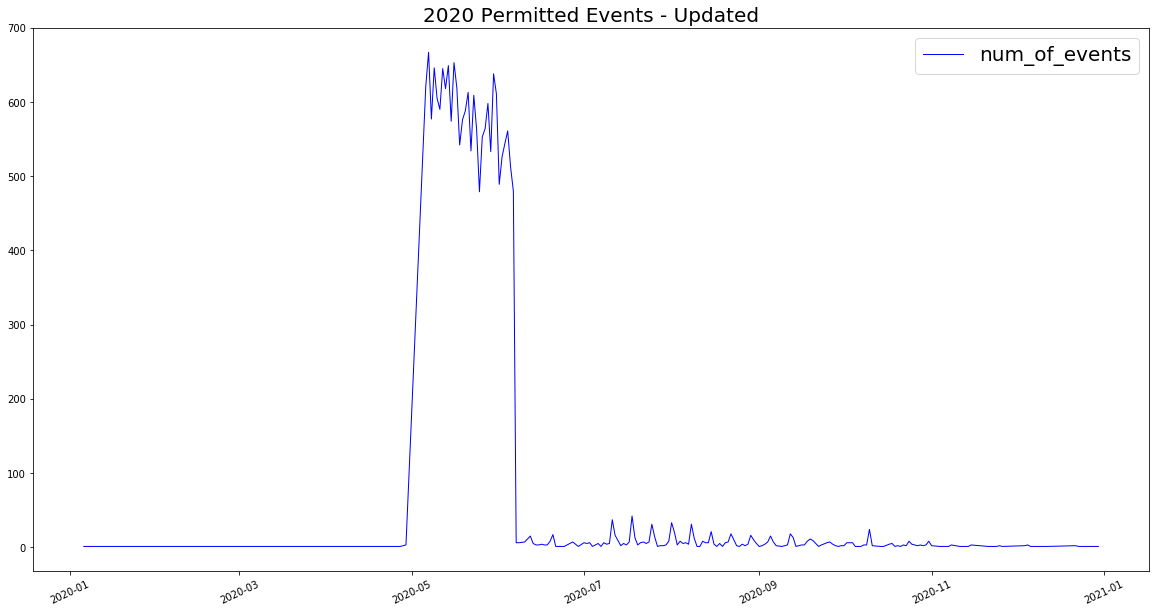

In [73]:
plt.plot('date','num_of_events', data=updated_pd, marker='', color='blue', linewidth=1)
plt.title('2020 Permitted Events - Updated',fontsize = 20)
plt.xticks( rotation=25 )
plt.rcParams['figure.figsize'] = (20,10)
plt.legend(prop={"size":20})

Compare Original VS. Updated (by Month)

In [52]:
planned_bymonth = spark.sql("""
SELECT MONTH(planned_date) AS month,
    COUNT(*) AS original_event
FROM plannedT
GROUP BY month
ORDER BY month
""")

In [53]:
planned_bymonth = planned_bymonth.withColumn('monthname',
                                            f.when(f.col('month') == 1, "Jan")\
                                            .when(f.col('month') == 2, "Feb")\
                                            .when(f.col('month') == 3, "Mar")\
                                            .when(f.col('month') == 4, "Apr")\
                                            .when(f.col('month') == 5, "May")\
                                            .when(f.col('month') == 6, "Jun")\
                                            .when(f.col('month') == 7, "Jul")\
                                            .when(f.col('month') == 8, "Aug")\
                                            .when(f.col('month') == 9, "Sep")\
                                            .when(f.col('month') == 10, "Oct")\
                                            .when(f.col('month') == 11, "Nov")\
                                            .when(f.col('month') == 12, "Dec"))

In [54]:
updated_bymonth = spark.sql("""
SELECT MONTH(updated_date) AS month,
    COUNT(*) AS updated_event
FROM updatedT
GROUP BY month
ORDER BY month
""")

In [57]:
compare = planned_bymonth.join(updated_bymonth,["month"]).orderBy("month")

In [69]:
compare.select("month", "monthname","original_event","updated_event").show()

+-----+---------+--------------+-------------+
|month|monthname|original_event|updated_event|
+-----+---------+--------------+-------------+
|    1|      Jan|        101000|            1|
|    2|      Feb|        107427|            1|
|    3|      Mar|        206310|            2|
|    4|      Apr|        541732|            4|
|    5|      May|        431715|        15465|
|    6|      Jun|         64539|         3223|
|    7|      Jul|         21082|          256|
|    8|      Aug|         22554|          261|
|    9|      Sep|         12749|          138|
|   10|      Oct|         10844|          104|
|   11|      Nov|          2113|           19|
|   12|      Dec|          2040|           20|
+-----+---------+--------------+-------------+



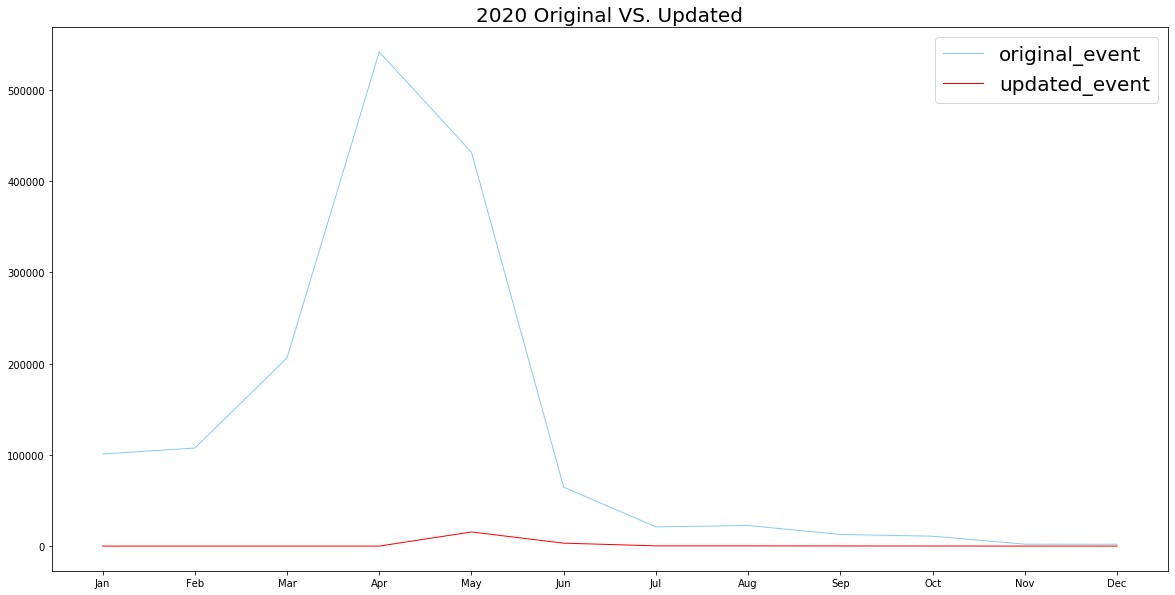

In [74]:
comparepd = compare.toPandas()
plt.plot('monthname','original_event', data=comparepd, marker='', color='skyblue', linewidth=1)
plt.plot('monthname','updated_event', data=comparepd, marker='', color='red', linewidth=1)
plt.title('2020 Original VS. Updated',fontsize = 20)
plt.rcParams['figure.figsize'] = (20,10)
plt.legend(prop={"size":20})